In [ ]:
%%html
<style type="text/css">
  span.ecb { background: yellow; }
</style>

<span class="ecb">Comments by ECB</span>

# ATMO 5331 - Homework 2 - Fall 2023
## Due 24 Sep, 2023 (Sunday, 11:59 pm)

When doing this homework, remember that you have three jobs:
1. Make it work and get the right answer.
2. Clean it up so that I can understand what you've done. If you think I might not undersand, document it with a comment or a function docstring.
3. Practice _generalizing_ your thinking: write code that is tolerant of changes to the specifics of a problem, but not the structure of the problem.

You should present your work with a clear logical progression. If that seems like a hassle, remember that in doing so you are practicing skills that are expected in your thesis and journal publications.

You may work alone or in pairs. I will not be adjudicating relative level of effort in group work, so you are responsible for ensuring there is an even contribution by your partner.

**Question 1**

Grab the [WGS84 implementation manual](https://www.icao.int/safety/pbn/documentation/eurocontrol/eurocontrol%20wgs%2084%20implementation%20manual.pdf), and implement a translation from geodetic latitude, longitude, and altitude (referenced to the WGS84 ellipsoid) to the local XYZ cartesian system used for WGS84.

Use part 1 of Helmert's formula on p. 81 (Appendix E), and refer to Fig. B-6 in Appendix B (p. 70) for information about the coordinate system notation.

Careful with degrees and radians.

Compare your results to what you get when using the `proj4` library. This library has its origins in public domain code written by the USGS, and is used in many open source packages, including the QGIS system. For easy use of the `proj4` library, we will use the helper routines in `coords.py`. I use these same helpers all the time in practice, and this code is running in operations in NOAA.

You set up a coordinate system transform object as shown below. It defaults to a WGS84 ellipsoid, so we don't have to specify that. Once the coordinate system object `geo` has been created, you can reuse it withouth calling `GeographicSystem()` again. It accepts arrays of data.
```
from coords import GeographicSystem 
geo = GeographicSystem() 
X, Y, Z = geo.toECEF(lon, lat, alt) # Use degrees
```

For your dataset, please use: 
```
import numpy as np
lat = np.array([  33.5,   1.0,   0.0,   0.0,   0.0,  10.0, -10.0]) 
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0]) 
alt = np.zeros_like(lat)
```

Demonstrate that your ECEF conversion equals that provided by the coordinate system library.


### SOLUTION
   - This will be provided in 3-parts: Helmert, Coords and comparism of both results

### (a.) Program implementing the `Helmerts_formula` for the `geodetic-to-ECEF conversion`

In [26]:
import numpy as np

def helmerts_formula(lat, lon, alt, a, e):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    # Calculate the radius of curvature in the prime vertical (N)
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)

    # Calculate X, Y, and Z using Helmert's Formula
    X = (N + alt) * np.cos(lat_rad) * np.cos(lon_rad)
    Y = (N + alt) * np.cos(lat_rad) * np.sin(lon_rad)
    Z = ((1 - e**2) * N + alt) * np.sin(lat_rad)

    return X, Y, Z

# Define our dataset as provided by Dr. Eric
lat = np.array([33.5, 1.0, 0.0, 0.0, 0.0, 10.0, -10.0])
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0])
alt = np.zeros_like(lat)  # Assuming altitudes are all zero for this example

# Defining the constants for the WGS84 ellipsoid
a = 6378137.0  # Semi-major axis (meters)
e = 0.0818191908426  # Eccentricity

# Here, we perform the geodetic-to-ECEF conversion 
X, Y, Z = helmerts_formula(lat, lon, alt, a, e)

# Format and display the results
for i in range(len(lat)):
    print(f"Point {i + 1}: X={X[i]}, Y={Y[i]}, Z={Z[i]}")


Point 1: X=-1061448.7541803515, Y=-5217187.307231329, Z=3500334.288022366
Point 2: X=1650533.5883109367, Y=-6159875.211175389, Z=110568.77482456704
Point 3: X=555891.26758132, Y=-6353866.263102791, Z=0.0
Point 4: X=2695517.1720840395, Y=-5780555.229886577, Z=0.0
Point 5: X=1650783.3278730563, Y=-6160807.251909879, Z=0.0
Point 6: X=1625868.3272134357, Y=-6067823.203577563, Z=1100248.5477353656
Point 7: X=1625868.3272134357, Y=-6067823.203577563, Z=-1100248.5477353656


### (b.) Program implementing `coods.py` for the `geodetic-to-ECEF conversion`
- `The coords.py module defines a set of classes and functions for handling various coordinate systems and transformations, including geographic systems, map projections, radar coordinate systems, and tangent plane Cartesian systems. These classes and functions make use of the proj4 library to perform coordinate transformations.` (*Attached only for my consumption and future reference*)

In [27]:
import numpy as np
from coords import GeographicSystem

# Create a GeographicSystem object (defaults to WGS84 ellipsoid)
geo = GeographicSystem()

# Define our dataset as provided by Dr. Eric
lat = np.array([33.5, 1.0, 0.0, 0.0, 0.0, 10.0, -10.0])
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0])
alt = np.zeros_like(lat)  # Assuming altitudes are all zero for this example

# Perform the geodetic-to-ECEF conversion using the GeographicSystem object
X, Y, Z = geo.toECEF(lon, lat, alt)

# Format and display the results
for i in range(len(lat)):
    print(f"Point {i + 1}: X={X[i]}, Y={Y[i]}, Z={Z[i]}")


Point 1: X=-1061448.7541803522, Y=-5217187.307231333, Z=3500334.2880223556
Point 2: X=1650533.5883109367, Y=-6159875.211175389, Z=110568.77482456664
Point 3: X=555891.26758132, Y=-6353866.263102791, Z=0.0
Point 4: X=2695517.1720840395, Y=-5780555.229886577, Z=0.0
Point 5: X=1650783.3278730563, Y=-6160807.251909879, Z=0.0
Point 6: X=1625868.3272134357, Y=-6067823.203577563, Z=1100248.5477353614
Point 7: X=1625868.3272134357, Y=-6067823.203577563, Z=-1100248.5477353614


### (c.) Program to compare the result of `Helmert's Formula` with that of `Coords.py`

In [28]:
import numpy as np

def helmerts_formula(lat, lon, alt, a, e):
    # Convert latitude and longitude from degrees to radians
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)

    # Calculate the radius of curvature in the prime vertical (N)
    N = a / np.sqrt(1 - e**2 * np.sin(lat_rad)**2)

    # Calculate X, Y, and Z using Helmert's Formula
    X = (N + alt) * np.cos(lat_rad) * np.cos(lon_rad)
    Y = (N + alt) * np.cos(lat_rad) * np.sin(lon_rad)
    Z = ((1 - e**2) * N + alt) * np.sin(lat_rad)

    return X, Y, Z

# Example usage:
lat = np.array([33.5, 1.0, 0.0, 0.0, 0.0, 10.0, -10.0])
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0])
alt = np.zeros_like(lat)  # Assuming altitudes are all zero for this example

# Constants for the WGS84 ellipsoid
a = 6378137.0  # Semi-major axis (meters)
e = 0.0818191908426  # Eccentricity

# Perform the conversion using Helmert's Formula
X_helmert, Y_helmert, Z_helmert = helmerts_formula(lat, lon, alt, a, e)

# Import and use the coord_sys_library (GeographicSystem)
from coords import GeographicSystem
geo = GeographicSystem()
X_geo, Y_geo, Z_geo = geo.toECEF(lon, lat, alt)

# Compare the result of ECEF conversion (Helmert) with coordinate system library (Coords)
for i in range(len(lat)):
    print(f"Point {i + 1}:")
    print(f"Helmert_Formula:  X={X_helmert[i]}, Y={Y_helmert[i]}, Z={Z_helmert[i]}")
    print(f"coord_Sys_Library:  X={X_geo[i]}, Y={Y_geo[i]}, Z={Z_geo[i]}")
    print()  # Blank line for separation


Point 1:
Helmert_Formula:  X=-1061448.7541803515, Y=-5217187.307231329, Z=3500334.288022366
coord_Sys_Library:  X=-1061448.7541803522, Y=-5217187.307231333, Z=3500334.2880223556

Point 2:
Helmert_Formula:  X=1650533.5883109367, Y=-6159875.211175389, Z=110568.77482456704
coord_Sys_Library:  X=1650533.5883109367, Y=-6159875.211175389, Z=110568.77482456664

Point 3:
Helmert_Formula:  X=555891.26758132, Y=-6353866.263102791, Z=0.0
coord_Sys_Library:  X=555891.26758132, Y=-6353866.263102791, Z=0.0

Point 4:
Helmert_Formula:  X=2695517.1720840395, Y=-5780555.229886577, Z=0.0
coord_Sys_Library:  X=2695517.1720840395, Y=-5780555.229886577, Z=0.0

Point 5:
Helmert_Formula:  X=1650783.3278730563, Y=-6160807.251909879, Z=0.0
coord_Sys_Library:  X=1650783.3278730563, Y=-6160807.251909879, Z=0.0

Point 6:
Helmert_Formula:  X=1625868.3272134357, Y=-6067823.203577563, Z=1100248.5477353656
coord_Sys_Library:  X=1625868.3272134357, Y=-6067823.203577563, Z=1100248.5477353614

Point 7:
Helmert_Formula:  

- NOTE: *Both `HELMERT` and `COORDS` produced the same result*

**Question 2.**

Using the `TangentPlaneCartesianSystem` class, convert the geodetic coordinates to local $(x, y, z)$. Create three tangent planes:

- A tangent plane centered at the MCOM building on the TTU campus, at the height of the ground at that location.

- A tangent plane centered at the MCOM building on the TTU campus, at the ellipsoid.

- A tangent plane directly below the GOES-East satellite at -75.0 degrees longitude.

Use `TangentPlaneCartesianSystem?` in the notebook to learn about the arguments accepted by the projection class. It has the same `.toECEF` and `.fromECEF` methods as the `GeographicSystem`.

Transform the geodetic dataset from the first problem into coordiantes with respect to each tangent plane.

You do not need to use the NAD83 locations of MCOM. They are only there to show my work on how I obtained the vertical position of MCOM in WGS84.

**a.** Using only the GOES-East tangent plane and the transformed geodetic dataset, show that the WGS84 earth shape is not spherical.

**b.** What is a rough, easily memorable rule of thumb for the number of kilometers per degree latitude?

**c.** Print out the tangent plane $(x,y,z)$ of the zeroth data point (it is a bit east of Lubbock). Explain why the differences in the coordinates of the two MCOM tangent planes make sense.

**d.** Imagine that there was no terrain, so that a radar located at MCOM was precisely on the WGS84 ellipsoid. If that radar were to scan toward the zeroth position at 0° elevation angle (assume no atmospheric refraction), how high above the ground would the beam be? Is this disance measured perpendicular to the ellipsoid or perpendicular to the tangent plane?

**e.** Transform your coordiantes back to ECEF from each tangent plane and show they're equal.

In [29]:
from coords import TangentPlaneCartesianSystem

# From USGS Elevation point query service
# https://nationalmap.gov/epqs/
# NAD83 lon, lat and NAVD88 vertical
mcom_lat_nad83, mcom_lon_nad83 = 33.581857, -101.880360 # NAD83
mcom_alt_nad83 = 983.15

# Using https://vdatum.noaa.gov/vdatumweb/, convert the above to "WGS84 G1674 (Use ITRF2008)"
mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

# The altitude difference is about the height of the geoid at this location.

#### SOLUTION

#### Program to create the tangent planes for the three scenarios and performing the necessary calculations:

In [32]:
from coords import TangentPlaneCartesianSystem

# Create TangentPlaneCartesianSystem instances for the three tangent planes
# 1. Create a tangent plane centered at the MCOM building at ground level
tpcs1 = TangentPlaneCartesianSystem(33.581857, -101.880360, 957.179)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane at ground level
Xmg, Ymg, Zmg = tpcs1.fromECEF(X, Y, Z)

# 2. Create a tangent plane centered at the MCOM building at the ellipsoid
tpcs2 = TangentPlaneCartesianSystem(33.581857, -101.880360, 0)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane at the ellipsoid
Xme, Yme, Zme = tpcs2.fromECEF(X, Y, Z)

# 3. Create a tangent plane directly below the GOES-East satellite
tpcs3 = TangentPlaneCartesianSystem(0.0, -75.0, 0.0)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane directly below the satellite
Xbs, Ybs, Zbs = tpcs3.fromECEF(X, Y, Z)

# Output the transformed coordinates for the 6th index only (to save space)
print("Ground Level:")
print(f"Xmg = {Xmg[6]:.7f}, Ymg = {Ymg[6]:.7f}, Zmg = {Zmg[6]:.7f}")

print("\nEllipsoid:")
print(f"Xme = {Xme[6]:.7f}, Yme = {Yme[6]:.7f}, Zme = {Zme[6]:.7f}")

print("\nBelow GOES-East Satellite:")
print(f"Xbs = {Xbs[6]:.7f}, Ybs = {Ybs[6]:.7f}, Zbs = {Zbs[6]:.7f}")


Ground Level:
Xmg = 2840216.8178408, Ymg = -3996165.7411012, Zmg = -2313187.4115831

Ellipsoid:
Xme = 2840216.8178408, Yme = -3996165.7411012, Zme = -2312230.2325831

Below GOES-East Satellite:
Xbs = 0.0000140, Ybs = -1100248.5477354, Zbs = -96264.1703965


#### Answer to (a)
- Use only the GOES-East tangent plane and the transformed geodetic dataset,to show that the WGS84 earth shape is not spherical. to prove that the Earth's surface is not flat


In [33]:
# calculate the difference in z-coordinates between the transformed coordinates 
# in the GOES-East tangent plane (z_goes_east) and the original geodetic altitudes (alt)

Z_difference = Zbs - alt   

print(Z_difference)

[-1.61344419e+06 -9.64919572e+02 -9.68982326e+04 -9.68982326e+04
  0.00000000e+00 -9.62641704e+04 -9.62641704e+04]


#### Note
- `The key concept to understand here is that if the Earth were spherical, you would expect all these differences to be zero because the tangent plane coordinates would match the geodetic coordinates perfectly. However, since the printed differences are not zero, it indicates that the Earth's shape is not spherical. These differences reflect the irregularities in the Earth's shape that the WGS84 model accounts for.`

### Answer to (b)
- Rule of thumb, it is Approximately 111.32 kilometers per degree latitude.

 - -`This value represents the length of one degree of latitude on the Earth's surface.`

### Answer to (c)

**c.** Print out the tangent plane $(x,y,z)$ of the zeroth data point (it is a bit east of Lubbock). Explain why the differences in the coordinates of the two MCOM tangent planes make sense.

In [34]:
print("Coordinates for the Zeroth Data Point (MCOM Building - Ground Level):")
print(f"x = {Xmg[0]:.7f}, y = {Ymg[0]:.7f}, z = {Zmg[0]:.7f}")

print("\nCoordinates for the Zeroth Data Point (MCOM Building - Ellipsoid Level):")
print(f"x = {Xme[0]:.7f}, y = {Yme[0]:.7f}, z = {Zme[0]:.7f}")


Coordinates for the Zeroth Data Point (MCOM Building - Ground Level):
x = 35343.7591263, y = -9014.2035517, z = -1061.3999035

Coordinates for the Zeroth Data Point (MCOM Building - Ellipsoid Level):
x = 35343.7591263, y = -9014.2035517, z = -104.2209035


In [35]:
# Output the transformed coordinates (X, Y, Z) for the 0th index only

print("Ground Level:")
print(f"Xmg = {Xmg[0]:.7f}, Ymg = {Ymg[0]:.7f}, Zmg = {Zmg[0]:.7f}")

print("\nEllipsoid:")
print(f"Xme = {Xme[0]:.7f}, Yme = {Yme[0]:.7f}, Zme = {Zme[0]:.7f}")

print("\nBelow GOES-East Satellite:")
print(f"Xbs = {Xbs[0]:.7f}, Ybs = {Ybs[0]:.7f}, Zbs = {Zbs[0]:.7f}")


Ground Level:
Xmg = 35343.7591263, Ymg = -9014.2035517, Zmg = -1061.3999035

Ellipsoid:
Xme = 35343.7591263, Yme = -9014.2035517, Zme = -104.2209035

Below GOES-East Satellite:
Xbs = -2375588.2019687, Ybs = 3500334.2879921, Zbs = -1613444.1923394


#### Explaining the differences in the coordinates of the two MCOM tangent planes:
- `X and Y Coordinates`: The X and Y coordinates are nearly identical for both the MCOM Ground Plane and the MCOM Ellipsoid Plane. This is because the X and Y coordinates are essentially a local Cartesian representation and are determined based on the same tangent point (the MCOM building's location). Therefore, they should be very close, if not identical.

- `Z Coordinate (Altitude)`: The primary difference lies in the Z coordinate (altitude), and here is why the differences make sense:

Basically, the difference is in their altitudes
- `MCOM Ground Plane (Zmg) represents the height above the ground level at the MCOM building. The altitude is much larger in magnitude (approximately -1061.40 meters) because it includes the elevation of the MCOM building above the reference ellipsoid and the altitude of the ground beneath it.`

on the other hand,
- `MCOM Ellipsoid Plane (Zme) represents the height above the reference ellipsoid, without considering the terrain or any structures like the MCOM building. The altitude is significantly smaller in magnitude (approximately -104.22 meters) because it only considers the elevation above the smooth, mathematical surface of the reference ellipsoid.`

### Answer to (d)
**d.** Imagine that there was no terrain, so that a radar located at MCOM was precisely on the WGS84 ellipsoid. If that radar were to scan toward the zeroth position at 0° elevation angle (assume no atmospheric refraction), how high above the ground would the beam be? Is this disance measured perpendicular to the ellipsoid or perpendicular to the tangent plane?


In [36]:
# Calculate the height above the ground when radar scans at 0° elevation angle
# (MCOM Ground Plane to GOES-East Plane)
height_above_ground = Zmg[0] - Zbs[0]

print(f"{height_above_ground} meters\n(And, the vertical distance is measured perpendicular to the tangent plane)")

1612382.79243591 meters
(And, the vertical distance is measured perpendicular to the tangent plane)


### Answer to (e)
**e.** Transform your coordiantes back to ECEF from each tangent plane and show they're equal.

Transform the coordiantes back to ECEF from each tangent plane

In [37]:
# Transform coordinates back to ECEF from each tangent plane
Xmg_back, Ymg_back, Zmg_back = tpcs1.toECEF(Xmg, Ymg, Zmg)
Xme_back, Yme_back, Zme_back = tpcs2.toECEF(Xme, Yme, Zme)
Xbs_back, Ybs_back, Zbs_back = tpcs3.toECEF(Xbs, Ybs, Zbs)

# Check if the transformed coordinates are equal to the original ECEF coordinates
equal_mg = np.allclose(Xmg_back, X, atol=1e-7) and np.allclose(Ymg_back, Y, atol=1e-7) and np.allclose(Zmg_back, Z, atol=1e-7)
equal_me = np.allclose(Xme_back, X, atol=1e-7) and np.allclose(Yme_back, Y, atol=1e-7) and np.allclose(Zme_back, Z, atol=1e-7)
equal_bs = np.allclose(Xbs_back, X, atol=1e-7) and np.allclose(Ybs_back, Y, atol=1e-7) and np.allclose(Zbs_back, Z, atol=1e-7)

# Print the results
print("Equality of Transformed Coordinates to Original ECEF:")
print("Ground Level:", equal_mg)
print("Ellipsoid:", equal_me)
print("Below GOES-East Satellite:", equal_bs)


Equality of Transformed Coordinates to Original ECEF:
Ground Level: True
Ellipsoid: True
Below GOES-East Satellite: True


Now, let's show they're equal.

In [38]:
# Check equality for Ground Level transformation
equal_mg = np.allclose([Xmg, Ymg, Zmg], [X, Y, Z], atol=1e-7)
print("Equality for Ground Level Transformation:", equal_mg)

# Output the transformed coordinates and original ECEF coordinates for Ground Level
print("Ground Level Transformation:")
for i in range(len(lat)):
    print(f"Point {i + 1}:")
    print(f"Original ECEF: X={X[i]:.7f}, Y={Y[i]:.7f}, Z={Z[i]:.7f}")
    print(f"Transformed:    Xmg={Xmg[i]:.7f}, Ymg={Ymg[i]:.7f}, Zmg={Zmg[i]:.7f}")
    print()  # Add an empty line for separation

# Check equality for Ellipsoid transformation
equal_me = np.allclose([Xme, Yme, Zme], [X, Y, Z], atol=1e-7)
print("Equality for Ellipsoid Transformation:", equal_me)

# Output the transformed coordinates and original ECEF coordinates for Ellipsoid
print("Ellipsoid Transformation:")
for i in range(len(lat)):
    print(f"Point {i + 1}:")
    print(f"Original ECEF: X={X[i]:.7f}, Y={Y[i]:.7f}, Z={Z[i]:.7f}")
    print(f"Transformed:    Xme={Xme[i]:.7f}, Yme={Yme[i]:.7f}, Zme={Zme[i]:.7f}")
    print()  # Add an empty line for separation

# Check equality for Below GOES-East Satellite transformation
equal_bs = np.allclose([Xbs, Ybs, Zbs], [X, Y, Z], atol=1e-7)
print("Equality for Below GOES-East Satellite Transformation:", equal_bs)

# Output the transformed coordinates and original ECEF coordinates for Below GOES-East Satellite
print("Below GOES-East Satellite Transformation:")
for i in range(len(lat)):
    print(f"Point {i + 1}:")
    print(f"Original ECEF: X={X[i]:.7f}, Y={Y[i]:.7f}, Z={Z[i]:.7f}")
    print(f"Transformed:    Xbs={Xbs[i]:.7f}, Ybs={Ybs[i]:.7f}, Zbs={Zbs[i]:.7f}")
    print()  # Add an empty line for separation


Equality for Ground Level Transformation: False
Ground Level Transformation:
Point 1:
Original ECEF: X=-1061448.7541804, Y=-5217187.3072313, Z=3500334.2880224
Transformed:    Xmg=35343.7591263, Ymg=-9014.2035517, Zmg=-1061.3999035

Point 2:
Original ECEF: X=1650533.5883109, Y=-6159875.2111754, Z=110568.7748246
Transformed:    Xmg=2883304.3718493, Ymg=-3034455.3427638, Zmg=-1572635.5172244

Point 3:
Original ECEF: X=555891.2675813, Y=-6353866.2631028, Z=0.0000000
Transformed:    Xmg=1852046.4124347, Ymg=-3356221.9978347, Zmg=-1287902.2501921

Point 4:
Original ECEF: X=2695517.1720840, Y=-5780555.2298866, Z=0.0000000
Transformed:    Xmg=3827813.8673874, Ymg=-2802257.5562509, Zmg=-2122258.8366927

Point 5:
Original ECEF: X=1650783.3278731, Y=-6160807.2519099, Z=0.0000000
Transformed:    Xmg=2883740.6399621, Ymg=-3127045.8510170, Zmg=-1633077.1625323

Point 6:
Original ECEF: X=1625868.3272134, Y=-6067823.2035776, Z=1100248.5477354
Transformed:    Xmg=2840216.8178120, Ymg=-2162939.4596040, 

**Question 3** Use the `GeostationaryFixedGridSystem` to define two more coordiante transformations for the GOES-East and GOES-West locations at -75.0 and -135.0 degrees longitude.

Use `GeostationaryFixedGridSystem?` in the notebook to learn about the arguments accepted by the projection class.

Convert the dataset to fixed grid coordinates.

For more on fixed grid coordiantes, you can read the [GOES-R L1b product users' guide](https://www.goes-r.gov/resources/docs.html) and [my own description of GOES fixed grid coordiantes](https://github.com/deeplycloudy/glmtools/blob/master/docs/fixedgridguide.md), a.k.a. [the geostationary projection](https://proj.org/operations/projections/geos.html).



In [50]:
from coords import GeostationaryFixedGridSystem

# Define the dataset as provided by Dr. Eric
lat = np.array([33.5, 1.0, 0.0, 0.0, 0.0, 10.0, -10.0])
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0])
alt = np.zeros_like(lat)  # Assuming altitudes are all zero for this example

# Define GeostationaryFixedGridSystem instances for GOES-East and GOES-West
goes_east_coords = GeostationaryFixedGridSystem(subsat_lat=0.0, subsat_lon=-75.0)
goes_west_coords = GeostationaryFixedGridSystem(subsat_lat=0.0, subsat_lon=-135.0)

# Initialize lists to store fixed grid coordinates
fixed_grid_coordinates_east = []
fixed_grid_coordinates_west = []

# Convert the dataset to fixed grid coordinates for both locations
for i in range(len(lat)):
    latitude = lat[i]
    longitude = lon[i]
    altitude = alt[i]
    
    # Convert to ECEF coordinates
    ecef_coordinates_east = goes_east_coords.toECEF(latitude, longitude, altitude)
    ecef_coordinates_west = goes_west_coords.toECEF(latitude, longitude, altitude)
    
    # Convert to fixed grid coordinates
    fixed_grid_coordinates_east.append(goes_east_coords.fromECEF(latitude, longitude, altitude))
    fixed_grid_coordinates_west.append(goes_west_coords.fromECEF(latitude, longitude, altitude))

# Print the fixed grid coordinates for each location
print("Fixed Grid Coordinates for GOES-East:")
for i, coordinates in enumerate(fixed_grid_coordinates_east):
    print(f"Data Point {i+1}: {coordinates}")

print("\nFixed Grid Coordinates for GOES-West:")
for i, coordinates in enumerate(fixed_grid_coordinates_west):
    print(f"Data Point {i+1}: {coordinates}")


Fixed Grid Coordinates for GOES-East:
Data Point 1: (inf, inf, inf)
Data Point 2: (inf, inf, inf)
Data Point 3: (inf, inf, inf)
Data Point 4: (inf, inf, inf)
Data Point 5: (inf, inf, inf)
Data Point 6: (inf, inf, inf)
Data Point 7: (inf, inf, inf)

Fixed Grid Coordinates for GOES-West:
Data Point 1: (inf, inf, inf)
Data Point 2: (inf, inf, inf)
Data Point 3: (inf, inf, inf)
Data Point 4: (inf, inf, inf)
Data Point 5: (inf, inf, inf)
Data Point 6: (inf, inf, inf)
Data Point 7: (inf, inf, inf)


**Question 4.** Make a plot of the east and north coordinate data from the lon/lat, 3 tangent plane, and two GOES fixed grid projections, for a total of 6 plots.

Transform and plot three more locations (your hometown, your undergraduate institution's location, and the farthest you've been from home).

Does everything make sense? If not, what do you observe? Offer a plausible explanation for what might have happened.

Label the coordinates with the altitude of the point in that coordinate reference system.

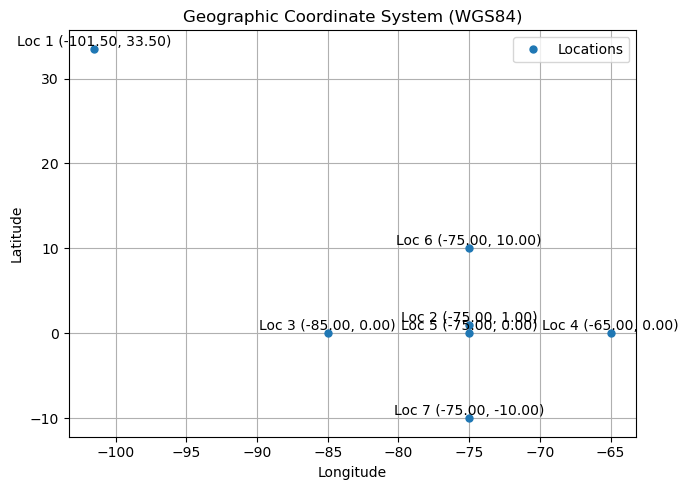

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset as provided by Dr. Eric
lat = np.array([33.5, 1.0, 0.0, 0.0, 0.0, 10.0, -10.0])
lon = np.array([-101.5, -75.0, -85.0, -65.0, -75.0, -75.0, -75.0])

# Create a figure with subplots
n_rows, n_cols = 1, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7, 5))

# Plot east (longitude) vs. north (latitude) using the Geographic Coordinate System
axes.plot(lon, lat, marker='o', markersize=5, label='Locations', linestyle='none')

# Set axis labels and title
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('Geographic Coordinate System (WGS84)')

# Add labels for the locations above the points
for i in range(len(lat)):
    axes.text(lon[i], lat[i], f'Loc {i+1} ({lon[i]:.2f}, {lat[i]:.2f})', ha='center', va='bottom')

# Add a legend
axes.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


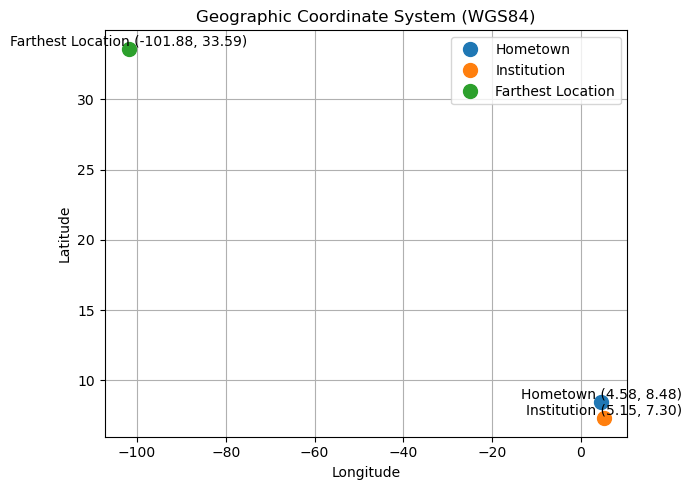

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from coords import GeographicSystem

# Your locations
hometown_lon, hometown_lat, hometown_alt = 4.58, 8.48, 135
institution_lon, institution_lat, institution_alt = 5.1461, 7.2972, 204
farthest_loc_lon, farthest_loc_lat, farthest_loc_alt = -101.884303, 33.593461, 380

# Create a figure with subplots
n_rows, n_cols = 1, 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(7, 5))

# Plot east (longitude) vs. north (latitude) using the Geographic Coordinate System
axes.plot(hometown_lon, hometown_lat, marker='o', markersize=10, label='Hometown', linestyle='none')
axes.plot(institution_lon, institution_lat, marker='o', markersize=10, label='Institution', linestyle='none')
axes.plot(farthest_loc_lon, farthest_loc_lat, marker='o', markersize=10, label='Farthest Location', linestyle='none')

# Set axis labels and title
axes.set_xlabel('Longitude')
axes.set_ylabel('Latitude')
axes.set_title('Geographic Coordinate System (WGS84)')

# Add labels for your locations above the points
axes.text(hometown_lon, hometown_lat, f'Hometown ({hometown_lon:.2f}, {hometown_lat:.2f})', ha='center', va='bottom')
axes.text(institution_lon, institution_lat, f'Institution ({institution_lon:.2f}, {institution_lat:.2f})', ha='center', va='bottom')
axes.text(farthest_loc_lon, farthest_loc_lat, f'Farthest Location ({farthest_loc_lon:.2f}, {farthest_loc_lat:.2f})', ha='center', va='bottom')

# Add a legend
axes.legend()

# Show the plot
plt.grid()
plt.tight_layout()
plt.show()


In [45]:
from coords import TangentPlaneCartesianSystem

# Define your ECEF coordinates for the Statue of Liberty, New York City, USA
X = -4470597.11  # ECEF X coordinate in meters
Y = -5411987.84  # ECEF Y coordinate in meters
Z = 2698567.93   # ECEF Z coordinate in meters

# Your locations
hometown_lon, hometown_lat, hometown_alt = 4.58, 8.48, 135
institution_lon, institution_lat, institution_alt = 5.1461, 7.2972, 204
farthest_loc_lon, farthest_loc_lat, farthest_loc_alt = -101.884303, 33.593461, 380

# Create TangentPlaneCartesianSystem instances for the three tangent planes
# 1. Create a tangent plane centered at your hometown at ground level
tpcs1 = TangentPlaneCartesianSystem(hometown_lat, hometown_lon, hometown_alt)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane at ground level
X_hometown, Y_hometown, Z_hometown = tpcs1.fromECEF(X, Y, Z)

# 2. Create a tangent plane centered at your institution at ground level
tpcs2 = TangentPlaneCartesianSystem(institution_lat, institution_lon, institution_alt)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane at ground level
X_institution, Y_institution, Z_institution = tpcs2.fromECEF(X, Y, Z)

# 3. Create a tangent plane centered at the farthest location at ground level
tpcs3 = TangentPlaneCartesianSystem(farthest_loc_lat, farthest_loc_lon, farthest_loc_alt)

# Transform ECEF coordinates (X, Y, Z) to the tangent plane at ground level
X_farthest_loc, Y_farthest_loc, Z_farthest_loc = tpcs3.fromECEF(X, Y, Z)

# Print the transformed coordinates
print("Transformed Coordinates for Hometown:")
print("X_hometown:", X_hometown)
print("Y_hometown:", Y_hometown)
print("Z_hometown:", Z_hometown)

print("\nTransformed Coordinates for Institution:")
print("X_institution:", X_institution)
print("Y_institution:", Y_institution)
print("Z_institution:", Z_institution)

print("\nTransformed Coordinates for Farthest Location:")
print("X_farthest_loc:", X_farthest_loc)
print("Y_farthest_loc:", Y_farthest_loc)
print("Z_farthest_loc:", Z_farthest_loc)


Transformed Coordinates for Hometown:
X_hometown: -5037724.796317706
Y_hometown: 3396168.3455008175
Z_hometown: -10814896.09263352

Transformed Coordinates for Institution:
X_institution: -4989180.056644076
Y_institution: 3309297.769492207
Z_institution: -10933249.277922042

Transformed Coordinates for Farthest Location:
X_farthest_loc: -3260248.1573644835
Y_farthest_loc: -1172081.9802215437
Z_farthest_loc: 299495.60538943484


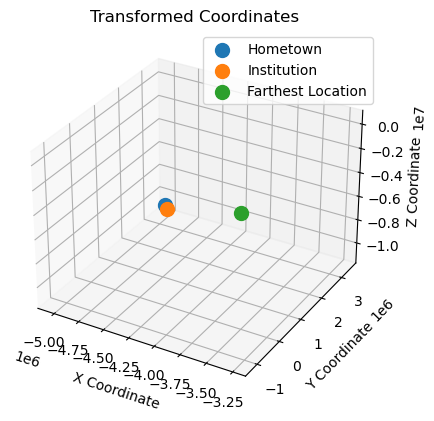

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Transformed Coordinates for Hometown
X_hometown = -5037724.796317706
Y_hometown = 3396168.3455008175
Z_hometown = -10814896.09263352

# Transformed Coordinates for Institution
X_institution = -4989180.056644076
Y_institution = 3309297.769492207
Z_institution = -10933249.277922042

# Transformed Coordinates for Farthest Location
X_farthest_loc = -3260248.1573644835
Y_farthest_loc = -1172081.9802215437
Z_farthest_loc = 299495.60538943484

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the coordinates
ax.scatter(X_hometown, Y_hometown, Z_hometown, marker='o', s=100, label='Hometown')
ax.scatter(X_institution, Y_institution, Z_institution, marker='o', s=100, label='Institution')
ax.scatter(X_farthest_loc, Y_farthest_loc, Z_farthest_loc, marker='o', s=100, label='Farthest Location')

# Set axis labels and title
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')
ax.set_title('Transformed Coordinates')

# Add a legend
ax.legend()

# Show the plot
plt.show()


In [47]:
hometown_lon, hometown_lat, hometown_alt  =  4.58, 8.48, 135
institution_lon, institution _lat, institution_alt =  5.1461, 7.2972, 204
farthest_loc_lon, farthest_loc_lat, farthest_loc_alt = -101.884303, 33.593461, 380


loc_lon = 
loc_lat = 
loc_alt = 


%matplotlib notebook
import matplotlib.pyplot as plt
n_rows, n_cols = 3, 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(8,8))

axes[0,0].plot
axes[0,0].set_xlabel('Longitude')
axes[0,0].set_ylabel('Latitude')
axes[0,0].set_title('WGS84')
axes[0,0].plot(lon, lat, marker='.', linestyle='none')
axes[0,0].plot(loc_lon, loc_lat, marker='.', linestyle='none')
for tlon, tlat, tlabel in zip(lon, lat, alt):
    axes[0,0].text(tlon, tlat, tlabel)
for tlon, tlat, tlabel in zip(loc_lon, loc_lat, loc_alt):
    axes[0,0].text(tlon, tlat, tlabel)


# Make the other five panels here
    
    
fig.tight_layout()

SyntaxError: invalid syntax (184781739.py, line 2)

In [ ]:
# BONUS! Make a 3D plot of all locations. 
# Try to imagine the curved earth surface on which they reside.
# This part is not graded, but might be useful to you.

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(X, Y, Z, marker='o', linestyle='none') # original locations
ax.plot(locX, locY, locZ, marker='o', linestyle='none') # personal locations
ax.set_xlabel('ECEF X (m)')
ax.set_ylabel('ECEF Y (m)')
ax.set_zlabel('ECEF Z (m)')
# ax.set_aspect('equal')

**5.** Using the arrays you created in the previous assignment, create a `pcolormesh` plot of the data in geostationary coordinates from both the GOES East and GOES West positions. (15 pts.)

In [48]:
# Import necessary modules
from coords import GeographicSystem
from coords import TangentPlaneCartesianSystem
import numpy as np

# Create a GeographicSystem object
geo = GeographicSystem()

# Define the longitude, latitude, and altitude of a point
mcom_lon, mcom_lat = -101.8803718553, 33.5818617015
mcom_alt = 957.179

# Define the dimensions and increments for a grid
nlon = 7                # Number of longitude values
nlat = 5                # Number of latitude values
dlon, dlat = 5.0, 5.0   # Increment

# Create a sample data array using NumPy
d = (np.arange(nlon * nlat) - (nlon * nlat / 2.0)) ** 2.0
d.shape = (nlat, nlon)  # Reshaping

# Compute longitude and latitude arrays using Dr. Eric's variable assignments of mcom
lon = np.linspace(-dlon * (nlon - 1) / 2, dlon * (nlon - 1) / 2, nlon) + mcom_lon
lat = np.linspace(-dlat * (nlat - 1) / 2, dlat * (nlat - 1) / 2, nlat) + mcom_lat

# Use np.meshgrid to create 2D coordinate arrays from lat & lon
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Create a 2D array 'alt' with the same shape as 'lon_grid' and 'lat_grid' filled with zeros
alt_grid = np.zeros_like(lon_grid)

# Create a list to store the results
tpcs_results = []

# Loop through each geographic coordinate and compute TPCS
for lon_arr, lat_arr, alt_arr in zip(lon_grid, lat_grid, alt_grid):
    # Perform the geodetic-to-ECEF conversion using the GeographicSystem object
    X_g, Y_g, Z_g = geo.toECEF(lon_arr, lat_arr, alt_arr)

    # Create a tangent plane for the GOES-East satellite
    tpcs_ge = TangentPlaneCartesianSystem(0.0, -75.0, 0.0)

    # Transform ECEF coordinates (X, Y, Z) to the tangent plane for GOES-East
    Xge, Yge, Zge = tpcs_ge.fromECEF(X_g, Y_g, Z_g)

    # Create a tangent plane for the GOES-West satellite
    tpcs_gw = TangentPlaneCartesianSystem(0.0, -135.0, 0.0)

    # Transform ECEF coordinates to the tangent plane for GOES-West
    Xgw, Ygw, Zgw = tpcs_gw.fromECEF(X_g, Y_g, Z_g)
    
    # Append the results to the list
    tpcs_results.append((Xge, Yge, Zge, Xgw, Ygw, Zgw))

# Print or access the results for the 0th index
if len(tpcs_results) > 0:
    result = tpcs_results[0]
    Xge, Yge, Zge, Xgw, Ygw, Zgw = result
    print("Coordinates for Grid Point 1:")
    print(f"TPCS for GOES-East: Xge = {Xge}, Yge = {Yge}, Zge = {Zge}")
    print(f"TPCS for GOES-West: Xgw = {Xgw}, Ygw = {Ygw}, Zgw = {Zgw}")
else:
    print("No results available for the 0th index.")


Coordinates for Grid Point 1:
TPCS for GOES-East: Xge = [-3904413.3867303  -3510032.7486464  -3088938.64192983 -2644335.84699629
 -2179608.05957372 -1698292.13873473 -1204051.18926339], Yge = [2535907.86517332 2535907.86517835 2535907.86518371 2535907.86518938
 2535907.8651953  2535907.86520144 2535907.86520773], Zge = [-2023597.01894878 -1699875.30953681 -1411757.9964009  -1161437.82626401
  -950819.88676834  -781507.10760804  -654788.06126636]
TPCS for GOES-West: Xgw = [1818935.55203583 2296477.09518511 2756541.06098926 3195626.08487427
 3610390.4646816  3997677.59303935 4354539.98105033], Ygw = [2535907.8652231  2535907.8652231  2535907.86522311 2535907.86522311
 2535907.86522312 2535907.86522313 2535907.86522313], Zgw = [ -819545.82971873  -999228.62635401 -1219848.16358642 -1479725.39352389
 -1776882.49352843 -2109057.91864067 -2473723.61330247]


#### Let's plot with pcolormesh

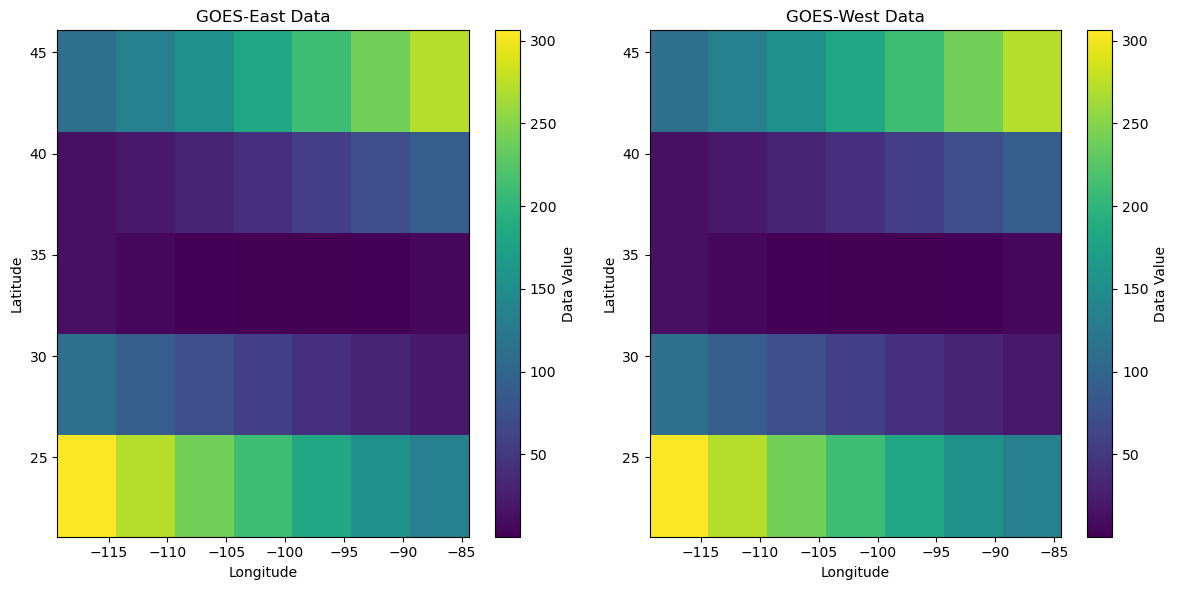

In [49]:
import matplotlib.pyplot as plt

# Create subplots for GOES-East and GOES-West
fig, (ax_ge, ax_gw) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the data for GOES-East
pcolormesh_ge = ax_ge.pcolormesh(lon_grid, lat_grid, d, shading='auto')
ax_ge.set_title('GOES-East Data')
ax_ge.set_xlabel('Longitude')
ax_ge.set_ylabel('Latitude')
fig.colorbar(pcolormesh_ge, ax=ax_ge, label='Data Value')

# Plot the data for GOES-West
pcolormesh_gw = ax_gw.pcolormesh(lon_grid, lat_grid, d, shading='auto')
ax_gw.set_title('GOES-West Data')
ax_gw.set_xlabel('Longitude')
ax_gw.set_ylabel('Latitude')
fig.colorbar(pcolormesh_gw, ax=ax_gw, label='Data Value')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**6.** One thing we didn't do in the previous assignment was plot in a "traditional" map projection. We'll do that now with the Azimuthal Equidistant and Gnomonic projections, centered on MCOM, as defined below. The MapProjection class has the same to/from ECEF methods, and coordinates returned are in meters relative to the center point. (15 pts.)

If you're curious, you can peruse [the full list of projections](https://proj.org/operations/projections/index.html) to see how to define others.

Create a plot of the same data in each map projection, and set the axis limits to +/- 1600 km. Do you notice any differences in the two projections?

In [ ]:
aeqd = MapProjection(projection='aeqd', lon_0=mcom_lon, lat_0=mcom_lat)
gnom = MapProjection(projection='gnom', lon_0=mcom_lon, lat_0=mcom_lat)

